2025-12-10

Salima Hassan

2726736

# Fondements de statistiques pour les sciences des données

## Projet UA3 — Projet Statistiques avec Python

### 1. Importation des bibliothèques et préparation des données 

In [1]:
# Importer les bibliothèques nécessaires
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
# Charger le dataset AmesHousing
df = pd.read_csv("AmesHousing.csv")

In [5]:
# Vérification initiale du contenu du dataset
print("Aperçu du dataset :")
display(df.head()) # Affiche les 5 premières lignes pour comprendre la structure

Aperçu du dataset :


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [7]:
df.info() # Informations générales : types, colonnes, valeurs manquantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [7]:
print("\nListe des quartiers disponibles :")
print(df["Neighborhood"].unique())


Liste des quartiers disponibles :
['NAmes' 'Gilbert' 'StoneBr' 'NWAmes' 'Somerst' 'BrDale' 'NPkVill'
 'NridgHt' 'Blmngtn' 'NoRidge' 'SawyerW' 'Sawyer' 'Greens' 'BrkSide'
 'OldTown' 'IDOTRR' 'ClearCr' 'SWISU' 'Edwards' 'CollgCr' 'Crawfor'
 'Blueste' 'Mitchel' 'Timber' 'MeadowV' 'Veenker' 'GrnHill' 'Landmrk']


In [15]:
# Comptage du nombre d'observations par quartier
print("\nEffectifs par quartier :")
value_counts = df["Neighborhood"].value_counts()
display(value_counts)


Effectifs par quartier :


Neighborhood
NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: count, dtype: int64

In [17]:
# Sélection des deux quartiers les plus représentés
top2 = value_counts.index[:2]
quartier1, quartier2 = top2[0], top2[1]

In [21]:
print(f"\nLes deux quartiers les plus représentés sont : {quartier1} et {quartier2}")

# Filtrer les données pour les deux quartiers
df_two = df[df["Neighborhood"].isin([quartier1, quartier2])]


Les deux quartiers les plus représentés sont : NAmes et CollgCr


In [27]:
# Calcul des statistiques descriptives sur les prix de vente
desc_stats = df_two.groupby("Neighborhood")["SalePrice"].describe().T
print("\nStatistiques descriptives pour les prix de vente :")
display(desc_stats)


Statistiques descriptives pour les prix de vente :


Neighborhood,CollgCr,NAmes
count,267.000000,443.000000
mean,201803.434457,145097.349887
std,54187.843749,31882.707229
min,110000.000000,68000.000000
25%,160875.000000,127000.000000
50%,200000.000000,140000.000000
75%,228250.000000,157500.000000
max,475000.000000,345000.000000


In [29]:
# Extraction des prix moyens pour interprétation
mean_q1 = desc_stats.loc["mean", quartier1]
mean_q2 = desc_stats.loc["mean", quartier2]

In [31]:
# Interprétation automatique des prix moyens
print("\nINTERPRÉTATION AUTOMATIQUE :")
print(f"• Prix moyen à {quartier1}: {mean_q1:,.0f} $")
print(f"• Prix moyen à {quartier2}: {mean_q2:,.0f} $")


INTERPRÉTATION AUTOMATIQUE :
• Prix moyen à NAmes: 145,097 $
• Prix moyen à CollgCr: 201,803 $


In [97]:
# Interprétation automatique
if mean_q1 > mean_q2:
    print(f"Le quartier {quartier1} semble plus cher que {quartier2}.")
else:
    print(f"Le quartier {quartier2} semble plus cher que {quartier1}.")

Le quartier CollgCr semble plus cher que NAmes.


In [33]:
# Réaffichage final en tableau transposé
df_two.groupby("Neighborhood")["SalePrice"].describe().T

Neighborhood,CollgCr,NAmes
count,267.000000,443.000000
mean,201803.434457,145097.349887
std,54187.843749,31882.707229
min,110000.000000,68000.000000
25%,160875.000000,127000.000000
50%,200000.000000,140000.000000
75%,228250.000000,157500.000000
max,475000.000000,345000.000000


In [35]:
# Extraction des prix de vente pour chaque quartier
north_ames = df[df["Neighborhood"] == "NAmes"]["SalePrice"]
college_creek = df[df["Neighborhood"] == "CollgCr"]["SalePrice"]

print(f"Nombre de ventes North Ames : {len(north_ames)}")
print(f"Nombre de ventes College Creek : {len(college_creek)}")

Nombre de ventes North Ames : 443
Nombre de ventes College Creek : 267


### 2. Visualisation des distributions

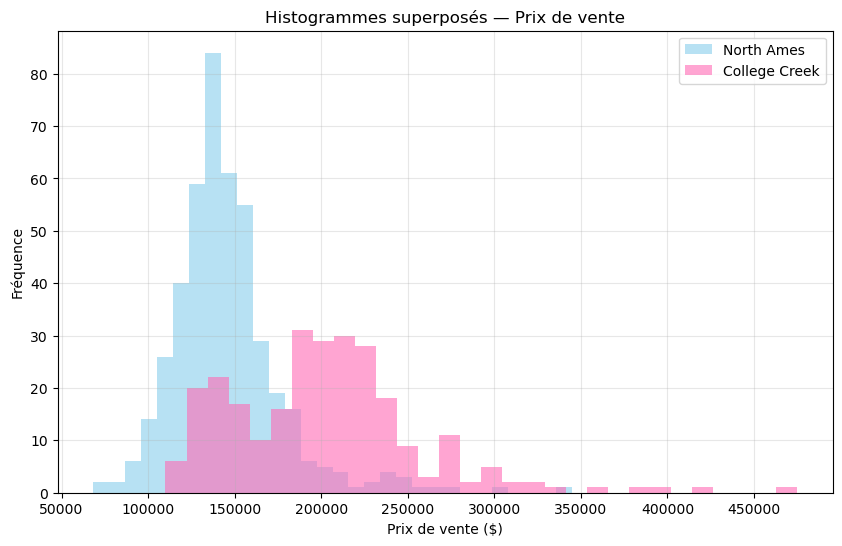

In [99]:
plt.figure(figsize=(10,6))
plt.hist(north_ames, bins=30, alpha=0.6, label="North Ames", color="skyblue")
plt.hist(college_creek, bins=30, alpha=0.6, label="College Creek", color='#FF69B4')

plt.xlabel("Prix de vente ($)")
plt.ylabel("Fréquence")
plt.title("Histogrammes superposés — Prix de vente")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [41]:
def plot_CDF(series, label, ax=None):
    """
    Crée une courbe CDF (fonction de distribution cumulative)
    pour une série Pandas.
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(8,6))

    # Trie des valeurs + calcul du rang relatif (pct=True pour pourcentage)
    sorted_values = series.sort_values()
    cdf = sorted_values.rank(pct=True)
    
    # Tracé de la CDF
    ax.plot(sorted_values, cdf, label=label)
    ax.set_xlabel("Valeur")
    ax.set_ylabel("CDF (probabilité cumulée)")
    ax.grid(alpha=0.3)

    return ax

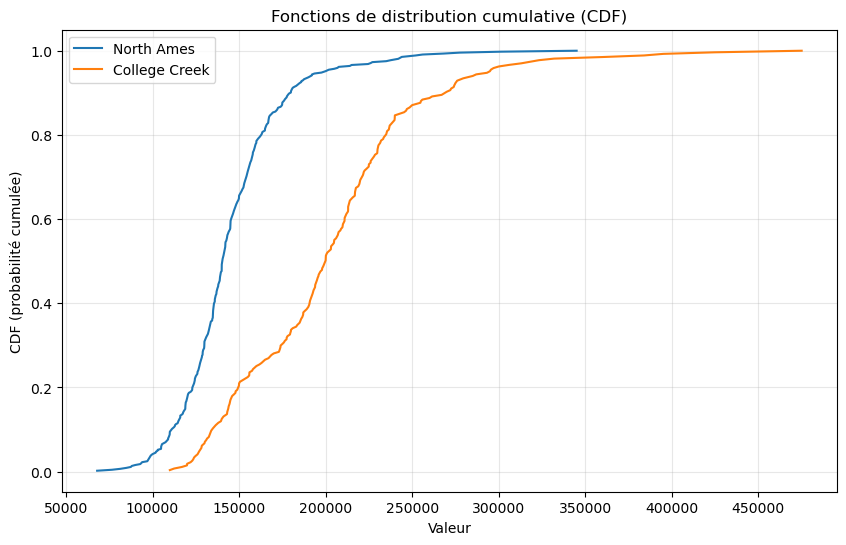

In [77]:
# Tracé des deux CDF sur le même graphique
fig, ax = plt.subplots(figsize=(10,6))

ax = plot_CDF(north_ames, "North Ames", ax=ax)
ax = plot_CDF(college_creek, "College Creek", ax=ax)

ax.set_title("Fonctions de distribution cumulative (CDF)")
ax.legend()

plt.show()

### 3. Exécution de tests statistiques pour comparer deux distributions

In [47]:
# Test KS pour comparer les distributions de prix
ks_result = stats.ks_2samp(north_ames, college_creek)

print("\nRésultat du test KS :")
print(ks_result)


Résultat du test KS :
KstestResult(statistic=0.5836609430085982, pvalue=3.2892428354379855e-53, statistic_location=172500, statistic_sign=1)


In [55]:
# Extraction des valeurs utiles
stat = ks_result.statistic
pvalue1 = ks_result.pvalue

In [57]:
print(f"\nStatistique KS : {stat:.4f}")


Statistique KS : 0.5837


In [61]:
# Interprétation automatique
alpha = 0.05
if pvalue1 <= alpha:
    print("Décision : On rejette H₀ — les distributions sont différentes.")
else:
    print("Décision : On NE rejette PAS H₀ — distributions similaires.")

Décision : On rejette H₀ — les distributions sont différentes.


### 4 : Test de la normalité des distributions

In [63]:
print("=== Test de normalité Shapiro–Wilk ===")

shapiro_na = stats.shapiro(north_ames) # Test Shapiro pour NAmes
shapiro_cc = stats.shapiro(college_creek) # Test Shapiro pour CollgCr

print("\nNorth Ames :")
print(f"Statistique = {shapiro_na.statistic:.4f}, p-value = {shapiro_na.pvalue:.6f}")

print("\nCollege Creek :")
print(f"Statistique = {shapiro_cc.statistic:.4f}, p-value = {shapiro_cc.pvalue:.6f}")

=== Test de normalité Shapiro–Wilk ===

North Ames :
Statistique = 0.8932, p-value = 0.000000

College Creek :
Statistique = 0.9278, p-value = 0.000000


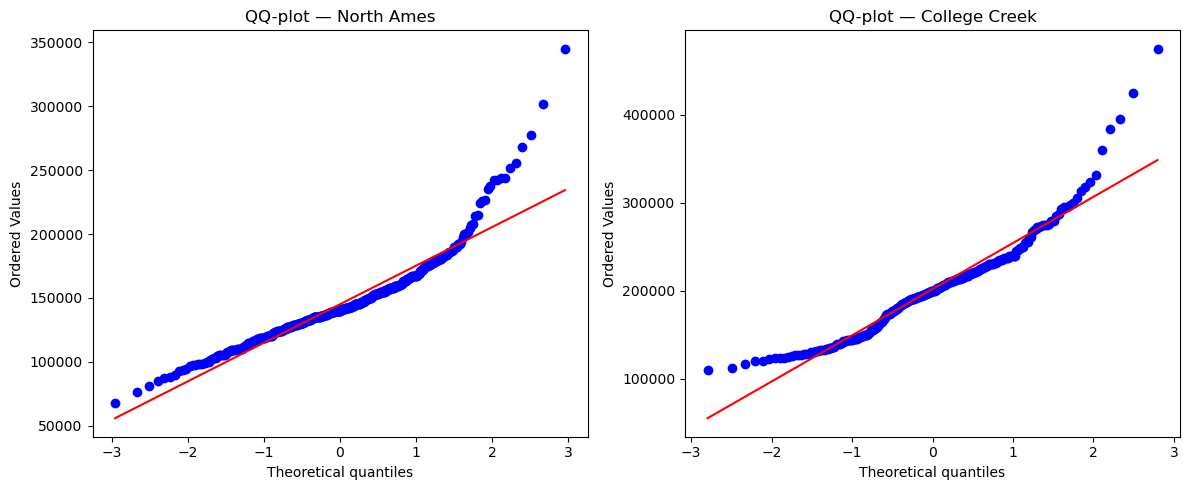

In [65]:
# QQ-PLOTS pour visualiser l'écart à la normalité
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
stats.probplot(north_ames, dist="norm", plot=plt)
plt.title("QQ-plot — North Ames")

plt.subplot(1,2,2)
stats.probplot(college_creek, dist="norm", plot=plt)
plt.title("QQ-plot — College Creek")

plt.tight_layout()
plt.show()

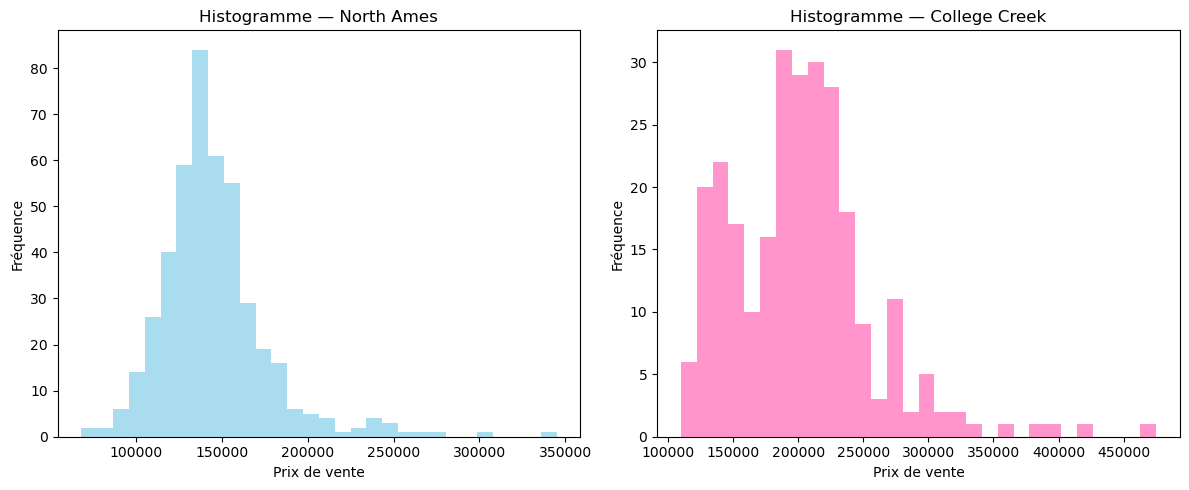

In [79]:
# Histogrammes individuels pour confirmer visuellement
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(north_ames, bins=30, alpha=0.7, color="skyblue")
plt.title("Histogramme — North Ames")
plt.xlabel("Prix de vente")
plt.ylabel("Fréquence")

plt.subplot(1,2,2)
plt.hist(college_creek, bins=30, alpha=0.7, color='#FF69B4')
plt.title("Histogramme — College Creek")
plt.xlabel("Prix de vente")
plt.ylabel("Fréquence")

plt.tight_layout()
plt.show()


### 5 : Vérification de la répartition en pieds carrés

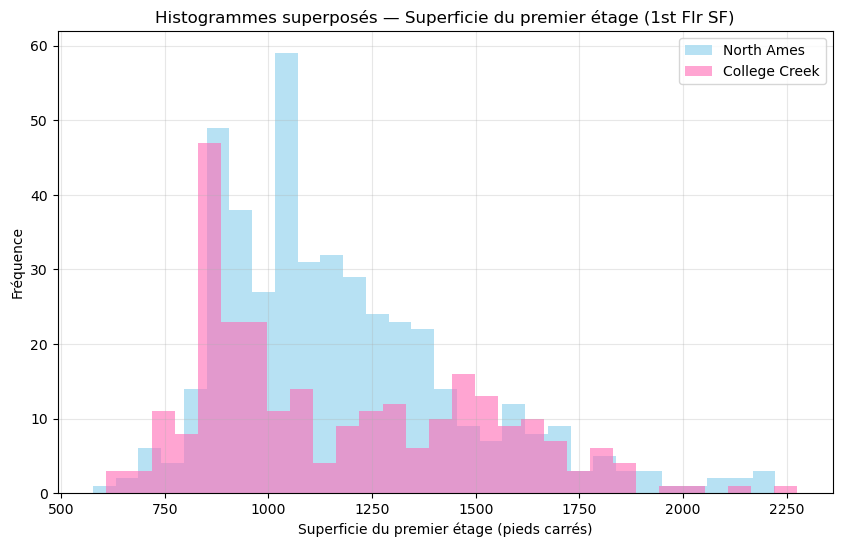

In [103]:
# Extraction de la variable "1st Flr SF" pour les deux quartiers
na_sf = df[df["Neighborhood"] == "NAmes"]["1st Flr SF"]
cc_sf = df[df["Neighborhood"] == "CollgCr"]["1st Flr SF"]

# Histogrammes superposés pour comparer les superficies
plt.figure(figsize=(10,6))
plt.hist(na_sf, bins=30, alpha=0.6, label="North Ames", color="skyblue")
plt.hist(cc_sf, bins=30, alpha=0.6, label="College Creek", color='#FF69B4')

plt.xlabel("Superficie du premier étage (pieds carrés)")
plt.ylabel("Fréquence")
plt.title("Histogrammes superposés — Superficie du premier étage (1st Flr SF)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [71]:
# Test KS sur les superficies
ks_sf = stats.ks_2samp(na_sf, cc_sf)

print("\n=== Test KS sur 1st Flr SF ===")
print(ks_sf)

# Extraction des résultats
stat = ks_sf.statistic
pvalue2 = ks_sf.pvalue

print(f"\nStatistique KS : {stat:.4f}")
print(f"Valeur p : {pvalue:.6f}")

# Interprétation finale
alpha = 0.05
if pvalue2 <= alpha:
    print("\nDécision : On rejette H₀ — les distributions sont différentes.")
else:
    print("\nDécision : On NE rejette PAS H₀ — distributions similaires.")



=== Test KS sur 1st Flr SF ===
KstestResult(statistic=0.15300851362433526, pvalue=0.0007057410997705426, statistic_location=992, statistic_sign=-1)

Statistique KS : 0.1530
Valeur p : 0.000000

Décision : On rejette H₀ — les distributions sont différentes.
